# Explore here

In [55]:
#Los IMPORTS

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


In [56]:
#Importar CSV
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
#Dimensiones del DataFrame
df.shape

(1338, 7)

In [58]:
#Resumen completo del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- BMI  = Índice de Masa Corporal (IMC)
- Charges = Costo del seguro

In [59]:
#Mostrar resumen estadístico básico del dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [60]:
#Mostrar duplicados del DataFrame
duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"Hay un total de {num_duplicados} duplicados en el DataFrame")


Hay un total de 1 duplicados en el DataFrame


In [61]:
#Eliminar duplicados del DataFrame
df = df.drop_duplicates()

print(f"Se han eliminado un total de {num_duplicados} duplicados del DataFrame")

Se han eliminado un total de 1 duplicados del DataFrame


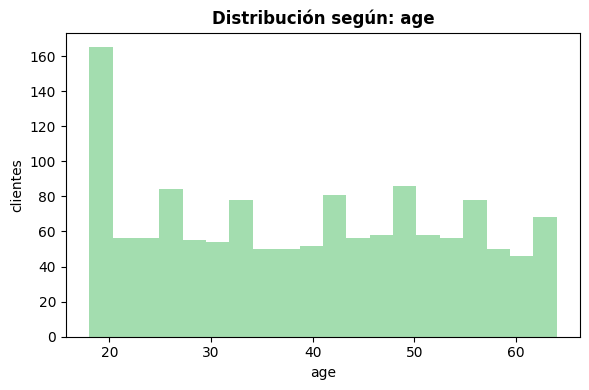

--- age ---
age
18    69
19    67
46    29
52    29
50    29
47    29
48    29
51    29
45    29
20    29
24    28
27    28
28    28
25    28
23    28
49    28
54    28
53    28
22    28
21    28
26    28
31    27
41    27
44    27
43    27
42    27
29    27
30    27
40    27
32    26
33    26
57    26
34    26
55    26
56    26
35    25
58    25
37    25
59    25
39    25
36    25
38    25
62    23
60    23
63    23
61    23
64    22
Name: count, dtype: int64




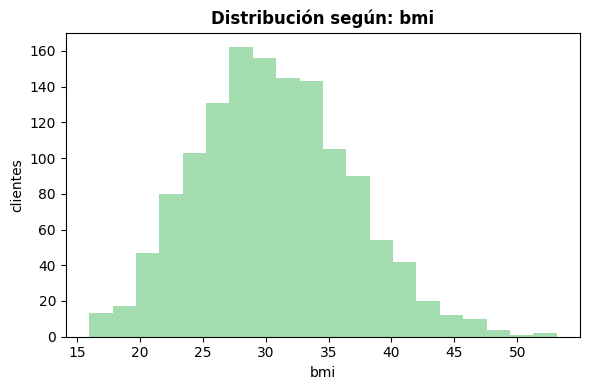

--- bmi ---
bmi
32.300    13
28.310     9
31.350     8
28.880     8
30.875     8
          ..
21.500     1
39.710     1
32.870     1
44.700     1
30.970     1
Name: count, Length: 548, dtype: int64




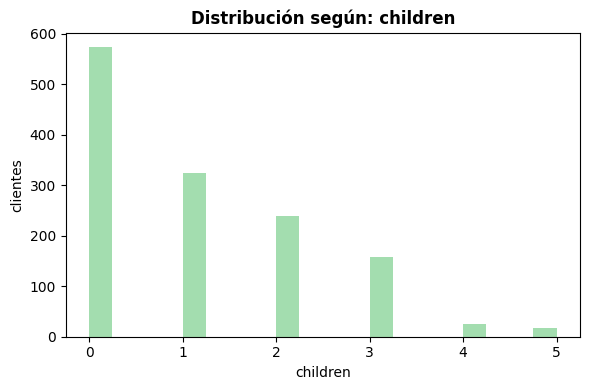

--- children ---
children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64




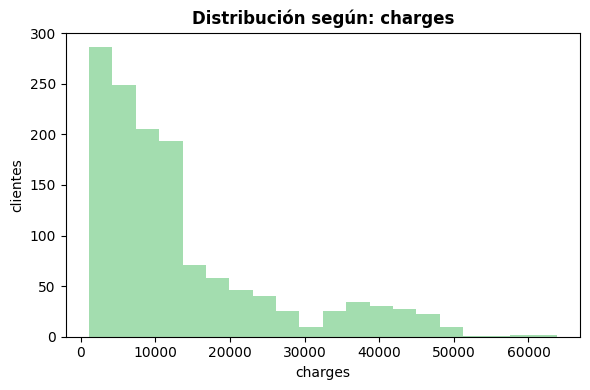

--- charges ---
charges
29141.36030    1
16884.92400    1
1725.55230     1
4449.46200     1
21984.47061    1
              ..
2775.19215     1
38711.00000    1
35585.57600    1
2198.18985     1
4687.79700     1
Name: count, Length: 1337, dtype: int64




In [62]:
#Separamos los valores que son del tipo -numérico- para visualizar su distribución
num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=20, color="#7CCF8E", alpha=0.7)
    plt.title(f"Distribución según: {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col)
    plt.ylabel("clientes")
    plt.tight_layout()
    plt.show()
        
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")

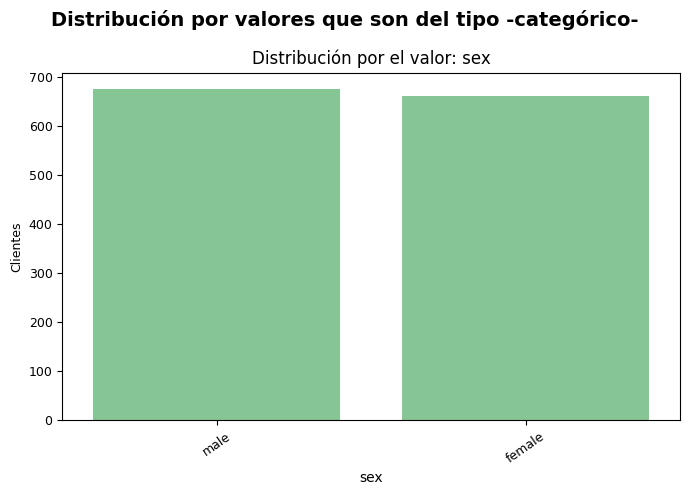

--- sex ---
sex
male      675
female    662
Name: count, dtype: int64




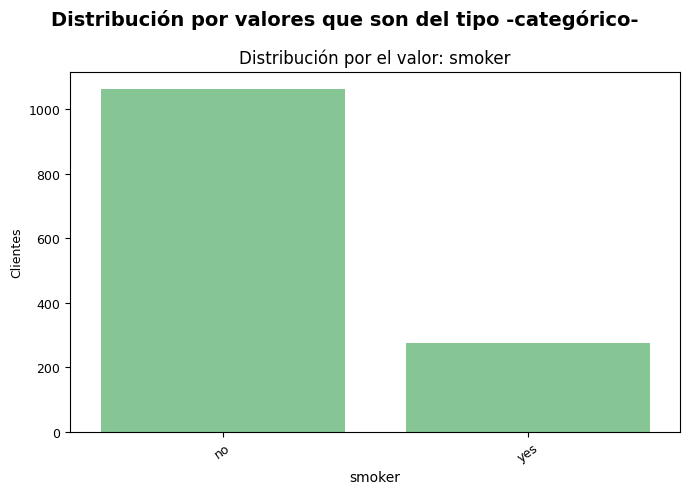

--- smoker ---
smoker
no     1063
yes     274
Name: count, dtype: int64




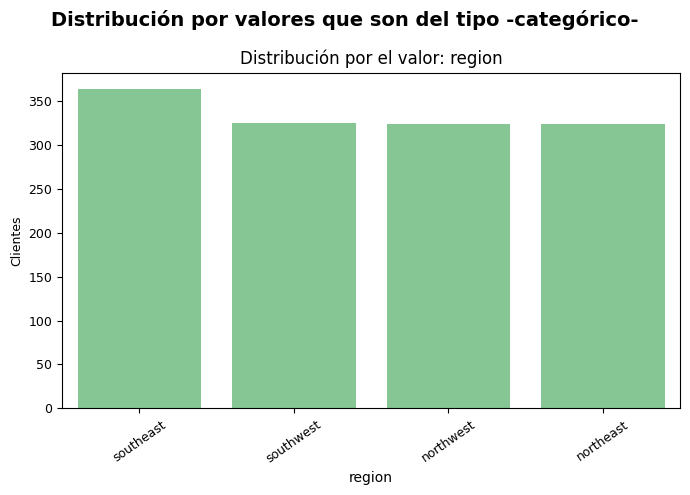

--- region ---
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64




In [63]:
#Separamos los valores que son del tipo -categórico- para visualizar su distribución
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    plt.figure(figsize=(7, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, color="#7CCF8E")
    plt.suptitle("Distribución por valores que son del tipo -categórico-", fontsize=14, fontweight="bold")
    plt.title(f"Distribución por el valor: {col}", fontsize=12)
    plt.xticks(rotation=35, fontsize=9)
    plt.ylabel("Clientes", fontsize=9)
    plt.yticks(fontsize=9)
    plt.tight_layout()
    plt.show()
    
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")

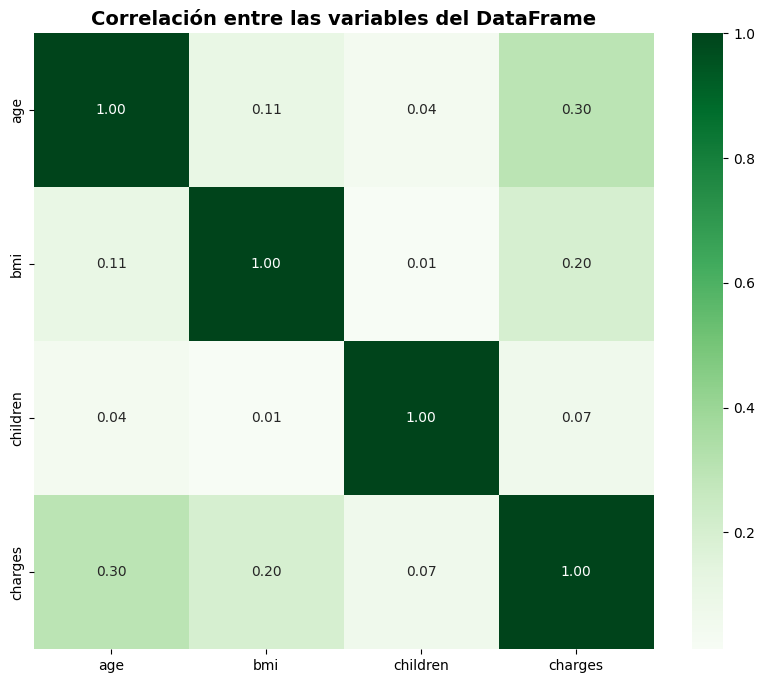

In [64]:
#Mapa de calor para buscar correlaciones entre las categorias
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlación entre las variables del DataFrame", fontsize=14, fontweight="bold")
plt.show()

Veamos como se comportarn ciertas combinaciones con los datos del DataFrame

In [65]:
#Al ser la categoria "region" un object lo pasamos a "numérico" para combinarlo con otros
region_map = {"southeast": 0, "southwest": 1, "northwest": 2, "northeast": 3}
df["region_num"] = df["region"].map(region_map)

print(df[["region", "region_num"]].head())
print(df["region_num"].dtype)

      region  region_num
0  southwest           1
1  southeast           0
2  southeast           0
3  northwest           2
4  northwest           2
int64


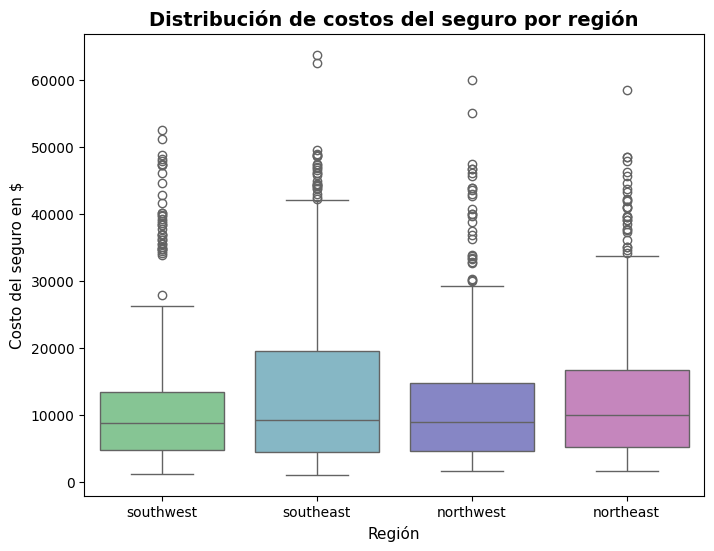

In [66]:
#Gráfica de distribución del costo del seguro según región
plt.figure(figsize=(8,6))
sns.boxplot(x="region", y="charges", hue="region", data=df, palette= ["#7CCF8E", "#7CBDCF", "#7C7CCF", "#CF7CC5"], dodge=False)
plt.title("Distribución de costos del seguro por región", fontsize=14, fontweight="bold")
plt.xlabel("Región", fontsize=11)
plt.ylabel("Costo del seguro en $", fontsize=11)
plt.show()

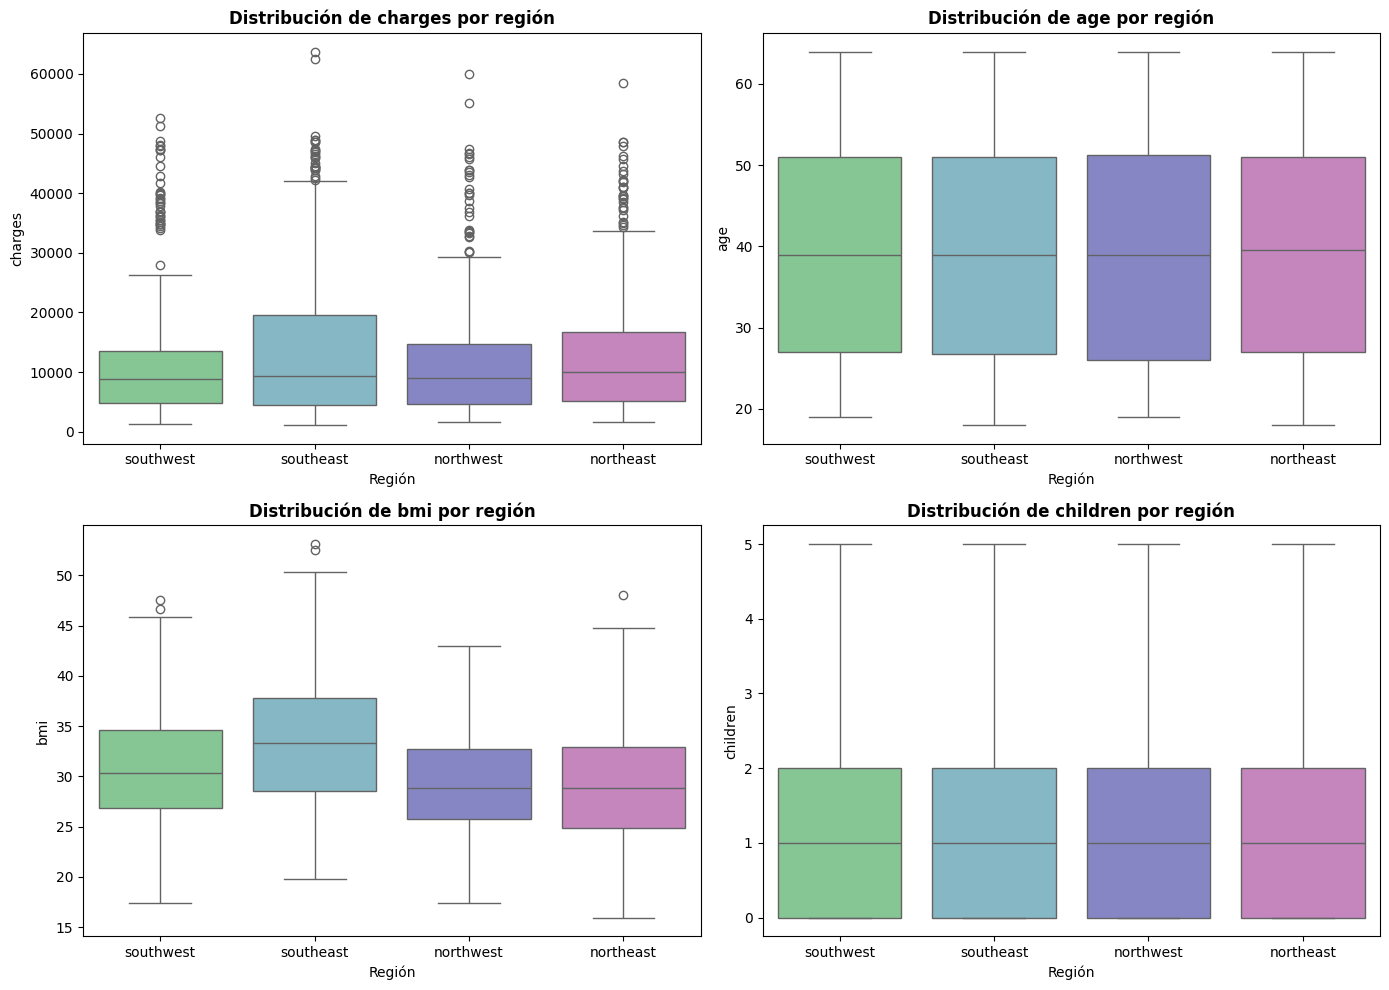

In [67]:
# Variables numéricas a comparar con 'region'
num_cols = ["charges", "age", "bmi", "children"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x="region", y=col, hue="region", data=df, palette= ["#7CCF8E", "#7CBDCF", "#7C7CCF", "#CF7CC5"], ax=axes[i], dodge=False)
    axes[i].set_title(f"Distribución de {col} por región", fontsize=12, fontweight="bold")
    axes[i].set_xlabel("Región")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

Sinceramente creí se verían más disparados según la ubicación... si vemos el precio por región, es más caro enfermarse en el este jeje... y otro dato que salta un poco más que otros es el de BMI, los del sureste comen mejor jajajaja y lanzo una hipotesis, que el precio sube porque las personas del sureste tienen obesidad y que por ello sus consultas son más caras siendo que tienen estudios más caros, corazón, diabetes, etc.